In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import ast
# Load your DataFrame here
df = pd.read_csv('60mins_data.csv')  # Assuming data is loaded into final_df

In [2]:
df.set_index('Datetime', inplace = True)
df.index = pd.to_datetime(df.index)
df['date'] = df.index.date

def rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    RS = gain / loss
    return 100 - (100 / (1 + RS))
df['RSI'] = rsi(df['Close'])
df

,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,RSI
Datetime,,,,,,,,,,
2021-12-02 00:00:00,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,NaN
2021-12-02 01:00:00,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,NaN
2021-12-02 02:00:00,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,NaN
2021-12-02 03:00:00,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,NaN
2021-12-02 04:00:00,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,72.020725
2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,68.421053
2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,68.421053


In [3]:
news_df = pd.read_csv("news_data_processed.csv")

In [4]:
news_df

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,...,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro,date_formatted
0,"Apple, AMC, Meta, And How Elon Musk Is Reactin...",https://www.benzinga.com/news/large-cap/22/12/...,20221231T190310,['Michael Cohen'],Benzinga examined the prospects for many inves...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",...,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2022-12-31
1,Bulls In A Bear Market: These 10 Stocks Clocke...,https://www.benzinga.com/analyst-ratings/analy...,20221231T161114,['Shanthi Rexaline'],2022 would go down as one of the worst years f...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,General,www.benzinga.com,"[{'topic': 'Life Sciences', 'relevance_score':...",...,0.0,0.166667,0.166667,0.166667,0.000000,0.158519,0.000000,0.0,0.000000,2022-12-31
2,Where Will Unity Software Stock Be in 3 Years?,https://www.fool.com/investing/2022/12/31/wher...,20221231T154500,['Leo Sun'],The game-engine developer still has a lot to p...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'IPO', 'relevance_score': '0.769861...",...,0.0,0.000000,0.000000,0.000000,0.000000,0.769861,0.360215,0.0,0.000000,2022-12-31
3,3 Unstoppable Growth Stocks to Buy After a Sto...,https://www.fool.com/investing/2022/12/31/3-un...,20221231T140000,['Dani Cook'],These companies have grown by triple-digit per...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2022-12-31
4,"Even in an Advertising Slowdown, These 3 Stock...",https://www.fool.com/investing/2022/12/31/even...,20221231T120000,['Adam Levy'],"Ad sales growth will slow in 2023, but these s...",https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",...,0.0,0.000000,0.000000,0.000000,0.158519,0.000000,0.000000,0.0,0.158519,2022-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24436,Nvidia's High-End Chips Ended Up In Chinese Ha...,https://www.benzinga.com/markets/asia/24/04/38...,20240423T050111,['Benzinga Neuro'],Chinese entities have managed to acquire high-...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Mergers & Acquisitions', 'relevanc...",...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.108179,0.0,0.000000,2024-04-23
24437,Broadcom Inc. ( AVGO ) Gains But Lags Market...,https://www.zacks.com/stock/news/2259620/broad...,20240422T214516,['Zacks Equity Research'],"In the most recent trading session, Broadcom I...",https://staticx-tuner.zacks.com/images/default...,Zacks Commentary,NaN,www.zacks.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-04-22
24438,Data Center Interconnect Market size worth $ 3...,https://www.benzinga.com/pressreleases/24/04/g...,20240422T140000,['Globe Newswire'],"Jersey City, New Jersey, April 22, 2024 ( GLOB...",https://www.benzinga.com/next-assets/images/sc...,Benzinga,General,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2024-04-22
24439,Is Nvidia Getting Ready to Disrupt Another Com...,https://www.fool.com/investing/2024/04/22/is-n...,20240422T123900,['Nicholas Rossolillo'],Some investors were second-guessing the streng...,https://g.foolcdn.com/editorial/images/773500/...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",...,0.0,0.000000,0.000000,0.000000,0.00

In [5]:
def parse_scores(string):
    # Strip the square brackets and split the string by spaces
    string = string.strip('[]')  # Remove the square brackets
    return [float(x) for x in string.split()]  # Split string by spaces and convert each to float

news_df['sentiment_scores'] = news_df['sentiment_scores'].apply(parse_scores)

In [6]:
# Convert 'date' to datetime if not already
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Aggregate the features by day
agg_funcs = {
    'overall_sentiment_score': 'mean',  # Average sentiment score
    'sentiment_scores': lambda x: np.mean(x.tolist(), axis=0),  # Averages list of sentiment scores
    'Technology': 'mean',  # Mean of topic mentions or relevance scores
    'Financial Markets': 'mean',
    'Manufacturing': 'mean',
    'Earnings': 'mean',
    'Finance': 'mean',
    'Retail & Wholesale': 'mean',
    'Economy - Monetary': 'mean',
    'Life Sciences': 'mean',
    'Energy & Transportation': 'mean',
    'Real Estate & Construction': 'mean',
    'Blockchain': 'mean',
    'IPO': 'mean',
    'Mergers & Acquisitions': 'mean',
    'Economy - Fiscal': 'mean',
    'Economy - Macro': 'mean'
}
news_agg = news_df.groupby('date').agg(agg_funcs).reset_index()
news_agg

,date,overall_sentiment_score,sentiment_scores,Technology,Financial Markets,Manufacturing,Earnings,Finance,Retail & Wholesale,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro
0,2022-05-12,0.064239,"[1.8709878e-08, 1.0, 2.8135954e-09]",0.000000,0.999989,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022-05-19,0.021270,"[2.1245808e-06, 0.99999547, 2.4317123e-06]",0.500000,0.929393,0.000000,0.995015,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.576289,0.000000,0.000000
2,2022-05-20,-0.011469,"[0.99998617, 8.2729338e-07, 1.3041486e-05]",0.500000,1.000000,0.000000,0.990893,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.576289,0.000000,0.000000
3,2022-05-23,-0.113675,"[0.99993038, 3.3889344e-05, 3.5714529e-05]",0.166667,0.796627,0.166667,0.495866,0.166667,0.166667,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-07-11,0.207154,"[0.3562292611078215, 0.5000470335195, 0.143723...",0.062500,0.224899,0.145833,0.454908,0.145833,0.000000,0.170672,0.645833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2024-04-25,0.171262,"[0.51338579949642, 0.2921899336248644, 0.19442...",0.582219,0.468079,0.210691,0.376314,0.079762,0.073004,0.068562,0.027358,0.014965,0.012000,0.010802,0.011956,0.013101,0.002540,0.002540
425,2024-04-26,0.178154,"[0.5372545517887845, 0.3377741671438087, 0.124...",0.540699,0.444263,0.244797,0.418581,0.069442,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
426,2024-04-27,0.160431,"[0.582552496174815, 0.24253969043678544, 0.174...",0.522481,0.430485,0.247610,0.342694,0.077067,0.072545,0.016349,0.035207,0.030233,0.014858,0.008482,0.016273,0.004915,0.000000,0.000000
427,2024-04-28,0.154736,"[0.5616168967561475, 0.3141608742365262, 0.124...",0.529885,0.346793,0.257718,0.329023,0.099261,0.066831,0.071810,0.020854,0.006979,0.018473,0.017723,0.010154,0.002876,0.006217,0.001562


In [7]:
# Example assuming sentiment_scores is a list of three sentiment scores per entry
news_agg[['sentiment1', 'sentiment2', 'sentiment3']] = pd.DataFrame(news_agg['sentiment_scores'].tolist(), index=news_agg.index)

In [9]:
ind = df.index

In [10]:
# Merge with your original df which has stock prices
df = df.merge(news_agg, on='date', how='left')
df.set_index(ind, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,RSI,...,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro,sentiment1,sentiment2,sentiment3
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-12-02 00:00:00,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 01:00:00,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 02:00:00,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 03:00:00,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-02 04:00:00,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,72.020725,...,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819,0.537255,0.337774,0.124971
2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,68.421053,...,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819,0.537255,0.337774,0.124971
2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,68.421053,...,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819,0.537255,0.337774,0.124971


In [23]:
df.fillna(method='ffill', inplace=True)  # Forward fill to propagate the last valid observation forward
df.fillna(0, inplace=True)

In [24]:
df['month']  = df.index.month

In [25]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Random',
       'Chronological', 'date', 'RSI', 'overall_sentiment_score',
       'sentiment_scores', 'Technology', 'Financial Markets', 'Manufacturing',
       'Earnings', 'Finance', 'Retail & Wholesale', 'Economy - Monetary',
       'Life Sciences', 'Energy & Transportation',
       'Real Estate & Construction', 'Blockchain', 'IPO',
       'Mergers & Acquisitions', 'Economy - Fiscal', 'Economy - Macro',
       'sentiment1', 'sentiment2', 'sentiment3', 'month'],
      dtype='object')

In [26]:
df[features].isnull().sum()

Close                         0
month                         0
overall_sentiment_score       0
sentiment1                    0
sentiment2                    0
sentiment3                    0
Technology                    0
Financial Markets             0
Manufacturing                 0
Earnings                      0
Finance                       0
Retail & Wholesale            0
Economy - Monetary            0
Life Sciences                 0
Energy & Transportation       0
Real Estate & Construction    0
Blockchain                    0
IPO                           0
Mergers & Acquisitions        0
Economy - Fiscal              0
Economy - Macro               0
dtype: int64

In [42]:
# Split data into training and testing sets
train_df = df[df['Chronological']==False]
test_df = df[df['Chronological']==True]

In [44]:
time_step = 30
def create_dataset(data, features, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[features][i:(i + time_step)].to_numpy()  # Select the required features
        X.append(a)
        y.append(data['Close'][i + time_step])
    return np.array(X), np.array(y)

# Selecting features
features = ['Close','month','overall_sentiment_score','sentiment1', 'sentiment2', 'sentiment3', 'Technology', 'Financial Markets', 'Manufacturing', 'Earnings', 'Finance', 'Retail & Wholesale', 'Economy - Monetary', 'Life Sciences', 'Energy & Transportation', 'Real Estate & Construction', 'Blockchain', 'IPO', 'Mergers & Acquisitions', 'Economy - Fiscal', 'Economy - Macro']
X_train, y_train = create_dataset(train_df, features, time_step)
X_test, y_test = create_dataset(test_df, features, time_step)


In [45]:
# Initialize scaler for the target variable
target_scaler = MinMaxScaler(feature_range=(0, 1))
# Scale y_train and y_test
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

In [46]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, len(features))),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train_scaled, validation_data=(X_test, y_test_scaled), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
186/186 [==============================] - 8s 23ms/step - loss: 0.0553 - val_loss: 0.4408
Epoch 2/10
186/186 [==============================] - 3s 19ms/step - loss: 0.0484 - val_loss: 0.4157
Epoch 3/10
186/186 [==============================] - 3s 19ms/step - loss: 0.0481 - val_loss: 0.4007
Epoch 4/10
186/186 [==============================] - 4s 19ms/step - loss: 0.0488 - val_loss: 0.4306
Epoch 5/10
186/186 [==============================] - 3s 19ms/step - loss: 0.0484 - val_loss: 0.4233
Epoch 6/10
186/186 [==============================] - 4s 19ms/step - loss: 0.0485 - val_loss: 0.4387
Epoch 7/10
186/186 [==============================] - 3s 19ms/step - loss: 0.0485 - val_loss: 0.4415
Epoch 8/10
186/186 [==============================] - 4s 19ms/step - loss: 0.0484 - val_loss: 0.4041
Epoch 9/10
186/186 [==============================] - 4s 19ms/step - loss: 0.0483 - val_loss: 0.3840
Epoch 10/10
186/186 [==============================] - 3s 19ms/step - loss: 0.0481 - val_lo

In [48]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = target_scaler.inverse_transform(train_predict)
test_predict = target_scaler.inverse_transform(test_predict)

# Inverse transform actuals
y_train_inv = target_scaler.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_inv = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Calculate error metrics
train_mse = mean_squared_error(y_train_inv, train_predict)
test_mse = mean_squared_error(y_test_inv, test_predict)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

train_mape = mean_absolute_percentage_error(y_train_inv, train_predict)
test_mape = mean_absolute_percentage_error(y_test_inv, test_predict)
print("Train MAPE:", train_mape)
print("Test MAPE:", test_mape)

57/57 [==============================] - 0s 6ms/step
Train MSE: 85905.80886708428
Test MSE: 646278.1097459814
Train MAPE: 0.06054317020547425
Test MAPE: 0.15488878622150828


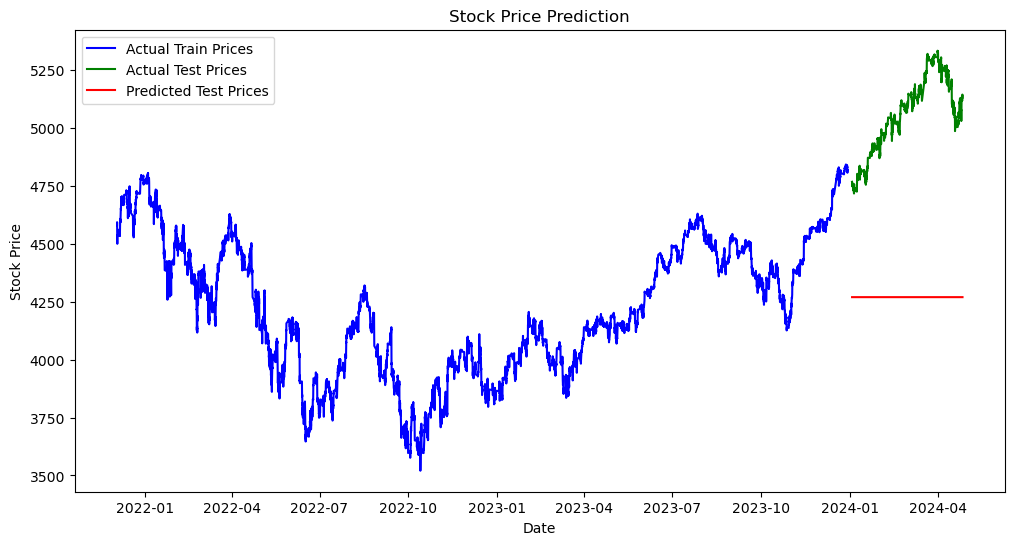

In [49]:
# Plotting
plt.figure(figsize=(12, 6))

# Correct the indices for train and test data to match the outputs
train_indices = train_df.index[time_step+1:len(train_predict)+time_step+1]
test_indices = test_df.index[time_step+1:len(test_predict)+time_step+1]

plt.plot(train_indices, y_train_inv, label='Actual Train Prices', color='blue')
plt.plot(test_indices, y_test_inv, label='Actual Test Prices', color='green')
plt.plot(test_indices, test_predict, label='Predicted Test Prices', color='red')

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


C:\Users\saite\AppData\Local\Temp\ipykernel_5856\878598978.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_record['Capital'].iloc[i] = capital
C:\Users\saite\AppData\Local\Temp\ipykernel_5856\878598978.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_record['Holdings'].iloc[i] = current_holdings
C:\Users\saite\AppData\Local\Temp\ipykernel_5856\878598978.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradi

Starting capital: $100,000.00
Ending portfolio value: $100,000.00
Profit / Loss: $0.00


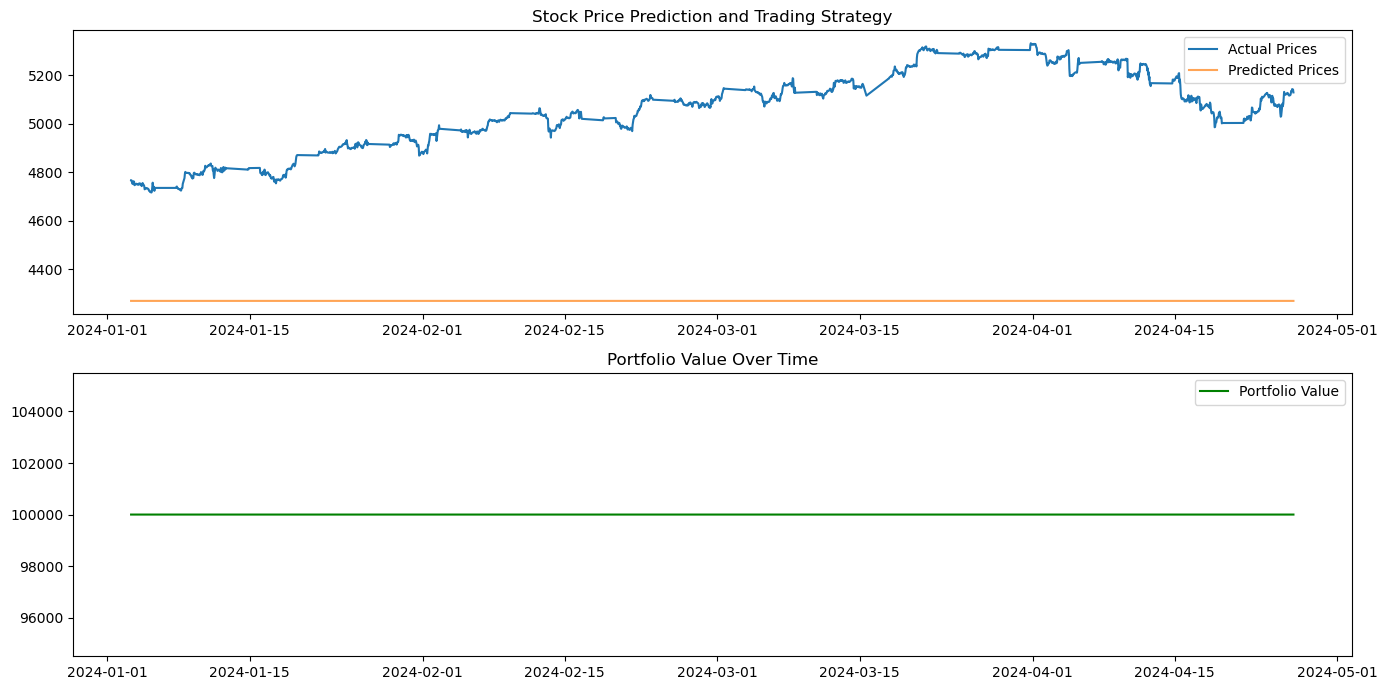

In [50]:
# Set initial capital and current holdings
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time
trading_record = pd.DataFrame(index=test_df.index[time_step+1:len(test_predict)+time_step+1])
trading_record['Actual'] = y_test_inv.ravel()
trading_record['Predicted'] = test_predict.ravel()
trading_record['Capital'] = initial_capital
trading_record['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(trading_record)):
    if trading_record['Predicted'].iloc[i] > trading_record['Actual'].iloc[i-1]:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / trading_record['Actual'].iloc[i]
            capital = 0.0
    elif trading_record['Predicted'].iloc[i] < trading_record['Actual'].iloc[i-1]:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * trading_record['Actual'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    trading_record['Capital'].iloc[i] = capital
    trading_record['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * trading_record['Actual'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(trading_record.index, trading_record['Actual'], label='Actual Prices')
plt.plot(trading_record.index, trading_record['Predicted'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = trading_record['Capital'] + trading_record['Holdings'] * trading_record['Actual']
plt.plot(trading_record.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\saite\AppData\Local\Temp\ipykernel_5856\855597237.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_record['Capital'].iloc[i] = capital
C:\Users\saite\AppData\Local\Temp\ipykernel_5856\855597237.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trading_record['Holdings'].iloc[i] = current_holdings
C:\Users\saite\AppData\Local\Temp\ipykernel_5856\855597237.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradi

Starting capital: $100,000.00
Ending portfolio value: $100,000.00
Profit / Loss: $0.00


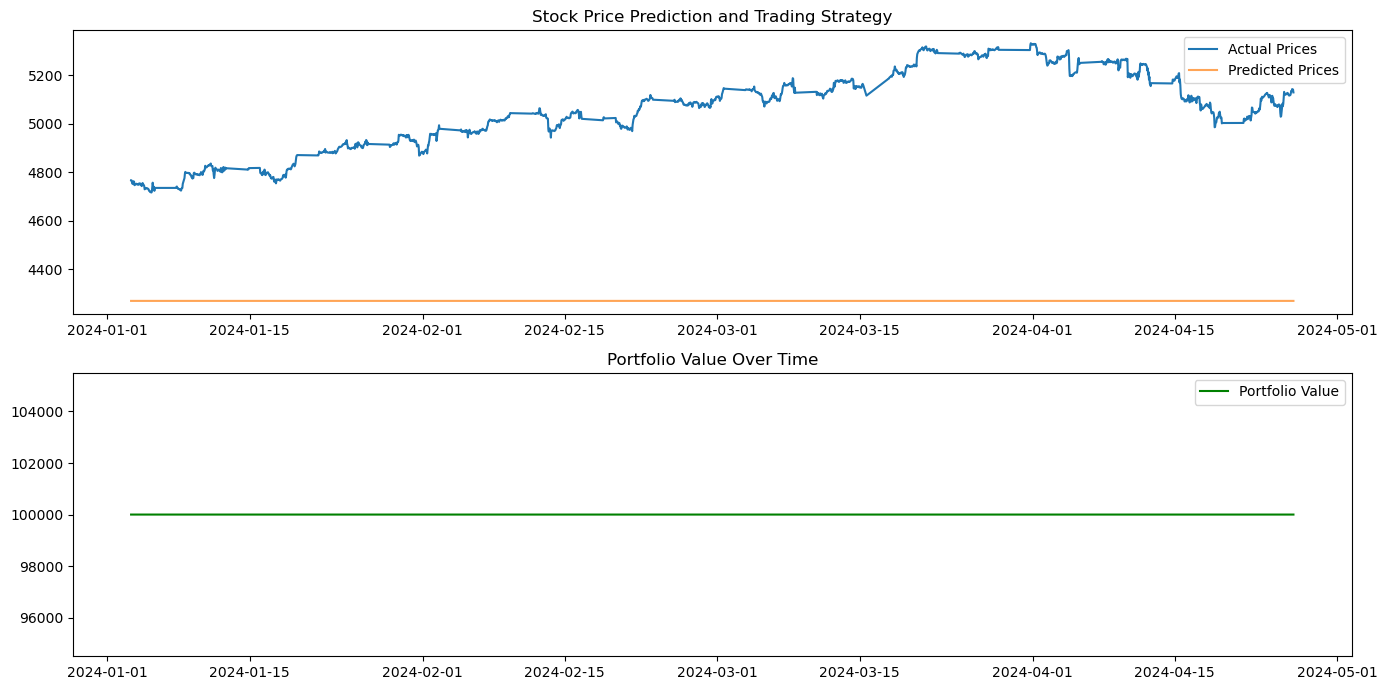

In [51]:
initial_capital = 100000.0
current_holdings = 0.0
capital = initial_capital

# Create a DataFrame to store trades and capital over time
trading_record = pd.DataFrame(index=test_df.index[time_step+1:len(test_predict)+time_step+1])
trading_record['Actual'] = y_test_inv.ravel()
trading_record['Predicted'] = test_predict.ravel()
trading_record['Capital'] = initial_capital
trading_record['Holdings'] = 0.0

# Simulate trading
for i in range(1, len(trading_record)):
    rsi_current = test_df['RSI'].iloc[i + time_step]
    if (trading_record['Predicted'].iloc[i] > trading_record['Actual'].iloc[i-1]) and rsi_current<30:
        # Buy signal: Invest all available capital
        if capital > 0:
            current_holdings = capital / trading_record['Actual'].iloc[i]
            capital = 0.0
    elif (trading_record['Predicted'].iloc[i] < trading_record['Actual'].iloc[i-1]) and rsi_current>70:
        # Sell signal: Sell all holdings
        if current_holdings > 0:
            capital = current_holdings * trading_record['Actual'].iloc[i]
            current_holdings = 0.0
    
    # Update capital and holdings records
    trading_record['Capital'].iloc[i] = capital
    trading_record['Holdings'].iloc[i] = current_holdings

# Calculate final value of portfolio (capital + value of holdings)
final_value = capital + current_holdings * trading_record['Actual'].iloc[-1]
print(f"Starting capital: ${initial_capital:,.2f}")
print(f"Ending portfolio value: ${final_value:,.2f}")
print(f"Profit / Loss: ${final_value - initial_capital:,.2f}")

# Plotting the backtest results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(trading_record.index, trading_record['Actual'], label='Actual Prices')
plt.plot(trading_record.index, trading_record['Predicted'], label='Predicted Prices', alpha=0.7)
plt.title('Stock Price Prediction and Trading Strategy')
plt.legend()

plt.subplot(2, 1, 2)
portfolio_value = trading_record['Capital'] + trading_record['Holdings'] * trading_record['Actual']
plt.plot(trading_record.index, portfolio_value, label='Portfolio Value', color='green')
plt.title('Portfolio Value Over Time')
plt.legend()

plt.tight_layout()
plt.show()
